In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import pyspark_dist_explore as pde
import pyspark
from pyspark.sql.functions import countDistinct

In [0]:
df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/mhoyle2@illinois.edu/SofiaSensorDataCleaned-1.csv", inferSchema = True)
df = df.withColumnRenamed("PM2.5","PM2_5")

In [0]:
df.show(5)

+---------+-------------------+--------+-----------------+------------------+------------------+------------------+--------+--------------+----------+-----+
|sensor_id|               date|location|              lat|               lon|              PM10|             PM2_5|district|district_group|month_name|month|
+---------+-------------------+--------+-----------------+------------------+------------------+------------------+--------+--------------+----------+-----+
|      739|2018-09-21 00:00:00|   354.0|42.69400000000015|            23.337| 8.009814814814815| 4.999135802469137| Sredets|   City Center| September|    9|
|      739|2018-09-22 00:00:00|   354.0|42.69399999999973|23.336999999999943|15.673511187607554| 10.29199655765921| Sredets|   City Center| September|    9|
|      739|2018-09-23 00:00:00|   354.0|42.69399999999973| 23.33699999999995| 26.57848013816925| 18.87569948186528| Sredets|   City Center| September|    9|
|      739|2018-09-24 00:00:00|   354.0|42.69399999999974|

In [0]:
df.describe('PM2_5').show()

+-------+------------------+
|summary|             PM2_5|
+-------+------------------+
|  count|            115463|
|   mean| 13.52517746497082|
| stddev|10.848572842869848|
|    min|               0.0|
|    max|             80.57|
+-------+------------------+



In [0]:
df.groupby('district').count().sort('district').show(50)

+--------------+-----+
|      district|count|
+--------------+-----+
|       Ilinden| 1040|
|         Iskar| 2976|
|        Izgrev| 3329|
|Krasna Polyana| 4356|
|   Krasno selo| 6833|
|  Kremikovetsi|  329|
|      Lozenets| 6990|
|        Lyulin| 3432|
|       Mladost|13087|
|      Nadezhda| 3056|
|    Novi Iskar| 1280|
|     Oborishte| 3919|
|   Ovcha kupel| 8197|
|    Pancharevo| 5918|
|      Poduyane| 4554|
|       Serdika| 3699|
|       Slatina| 7997|
|       Sredets| 2350|
|    Studentski| 3570|
|     Triaditsa| 7331|
|   Vazrazhdane| 2822|
|       Vitosha|15666|
|      Vrabnits| 2732|
+--------------+-----+



In [0]:
df.groupby('district').agg(countDistinct('sensor_id')).sort('district').show(50)

+--------------+----------------+
|      district|count(sensor_id)|
+--------------+----------------+
|       Ilinden|               4|
|         Iskar|              13|
|        Izgrev|              13|
|Krasna Polyana|              14|
|   Krasno selo|              24|
|  Kremikovetsi|               2|
|      Lozenets|              31|
|        Lyulin|              13|
|       Mladost|              46|
|      Nadezhda|              11|
|    Novi Iskar|               4|
|     Oborishte|              15|
|   Ovcha kupel|              29|
|    Pancharevo|              22|
|      Poduyane|              19|
|       Serdika|              18|
|       Slatina|              32|
|       Sredets|              14|
|    Studentski|              15|
|     Triaditsa|              30|
|   Vazrazhdane|              12|
|       Vitosha|              62|
|      Vrabnits|              10|
+--------------+----------------+



In [0]:
df.groupby('district_group').count().show()

+--------------------+-----+
|      district_group|count|
+--------------------+-----+
|         City Center| 9091|
|Peripheral Districts|33793|
|Early to Mid 20th...|46129|
|Socialist Housing...|26121|
| Industrial District|  329|
+--------------------+-----+



In [0]:
df.groupby('district_group').agg(countDistinct('sensor_id')).show()

+--------------------+----------------+
|      district_group|count(sensor_id)|
+--------------------+----------------+
|         City Center|              41|
|Peripheral Districts|             127|
|Early to Mid 20th...|             185|
|Socialist Housing...|              98|
| Industrial District|               2|
+--------------------+----------------+



In [0]:
df_pd = df.toPandas()

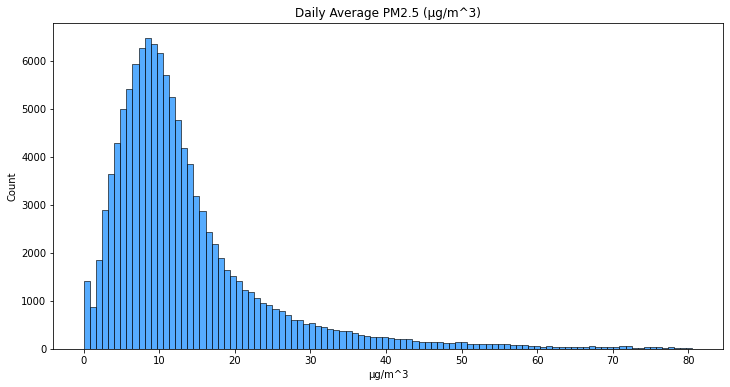

In [0]:
plt.figure(figsize = (12,6))
sns.histplot(df_pd['PM2_5'], bins = 100, color='dodgerblue', edgecolor = 'black')
plt.title('Daily Average PM2.5 (μg/m^3)')
plt.xlabel('μg/m^3')
plt.ylabel('Count')
#plt.savefig('/dbfs/FileStore/PM2_5_histogram.png')
fig.show()

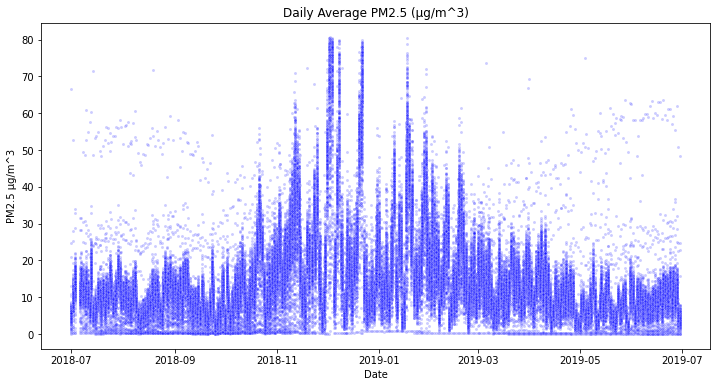

In [0]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'date', y = 'PM2_5', data = df_pd, color = 'blue', alpha = 0.2, marker = '.')
plt.title('Daily Average PM2.5 (μg/m^3)')
plt.xlabel('Date')
plt.ylabel('PM2.5 μg/m^3')
#plt.savefig('/dbfs/FileStore/PM2_5_byDate.png')
fig.show()

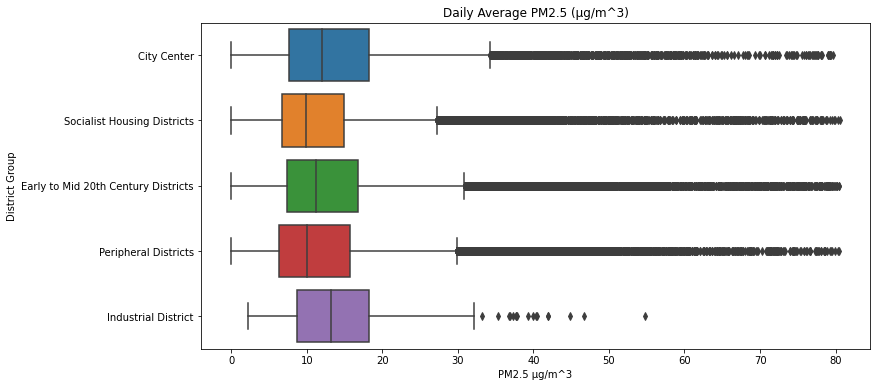

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'PM2_5', y = 'district_group', data = df_pd)
plt.title('Daily Average PM2.5 (μg/m^3)')
plt.xlabel('PM2.5 μg/m^3')
plt.ylabel('District Group')
#plt.savefig('/dbfs/FileStore/PM2_5_byDGroup.png')
fig.show()

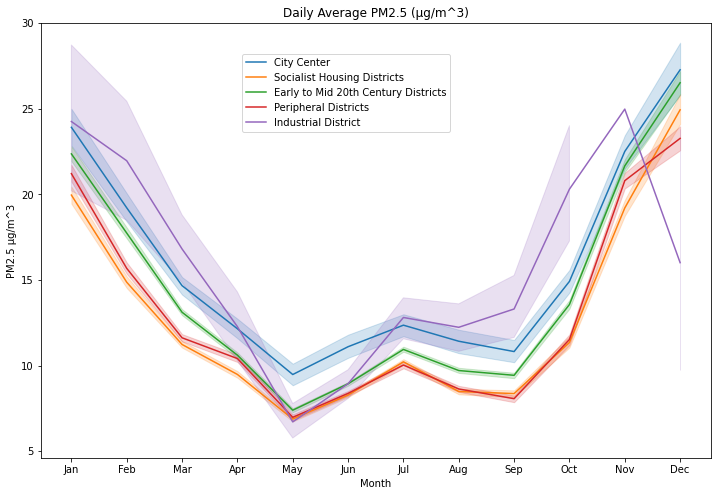

In [0]:
plt.figure(figsize = (12, 8))
sns.lineplot(x = 'month', y = 'PM2_5', data = df_pd, hue = 'district_group')
plt.title('Daily Average PM2.5 (μg/m^3)')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('PM2.5 μg/m^3')
plt.legend(loc = (0.3, 0.75))
#plt.savefig('/dbfs/FileStore/PM2_5_byDGroup_Month.png')
plt.show()